In [26]:
%run library_simulator.py

Customer (Fast) served at 9.86 minutes
Customer (Fast) served at 10.20 minutes
Customer (Normal) served at 17.13 minutes
Customer (Fast) served at 19.14 minutes
Customer (Fast) served at 23.60 minutes
Customer (Fast) served at 30.68 minutes
Customer (Fast) served at 46.97 minutes
Customer (Normal) served at 48.08 minutes
Customer (Fast) served at 49.66 minutes
Customer (Fast) served at 54.29 minutes
Customer (Slow) served at 59.31 minutes
Customer (Slow) served at 62.33 minutes
Customer (Normal) served at 63.83 minutes
Customer (Slow) served at 77.52 minutes
Customer (Normal) served at 85.54 minutes
Customer (Slow) served at 86.30 minutes
Customer (Slow) served at 88.63 minutes
Customer (Slow) served at 94.28 minutes
Customer (Normal) served at 96.71 minutes
Customer (Normal) served at 101.44 minutes
Customer (Fast) served at 103.40 minutes
Customer (Slow) served at 106.45 minutes
Customer (Slow) served at 107.39 minutes
Customer (Normal) served at 108.05 minutes
Customer (Slow) served

In [33]:
import numpy as np
import pandas as pd
import math

# Parámetros del sistema adaptados para 4 servidores
lambda_ = 15  # tasa de llegada (clientes por hora)
mu = 7       # tasa de servicio (clientes por hora)
c = 4         # número de servidores

# Cálculos intermedios
r = lambda_ / mu
rho = r / c

# Probabilidad de que no haya clientes en el sistema (P_0)
sumatoria = sum([(r**n) / math.factorial(n) for n in range(c)]) + (r**c) / (math.factorial(c) * (1 - rho))
P_0 = 1 / sumatoria

# Número promedio de clientes en la cola (L_q)
L_q = (r**c * rho / (math.factorial(c) * (1 - rho)**2)) * P_0

# Tiempo promedio de espera en la cola (W_q)
W_q = L_q / lambda_

# Lee los resultados de la simulación
results_df = pd.read_csv('all_simulations_statistics.csv')

# Filtra resultados según política de programación (FIFO y SJF) y número de servidores
fifo_results = results_df[(results_df['SJF'] == False) & (results_df['Num Librarians'] == c)]
sjf_results = results_df[(results_df['SJF'] == True) & (results_df['Num Librarians'] == c)]

# Calcula los valores medios de la simulación
mean_fifo_wait_time = fifo_results['Mean Wait Time'].mean()
mean_sjf_wait_time = sjf_results['Mean Wait Time'].mean()

mean_fifo_queue_length = fifo_results['Mean Queue Length'].mean()
mean_sjf_queue_length = sjf_results['Mean Queue Length'].mean()

# Crear un DataFrame para comparar los resultados teóricos y simulados
comparison_df = pd.DataFrame({
    "Indicador": ["Tiempo promedio de espera en la cola (W_q)", "Número promedio de clientes en la cola (L_q)"],
    "Teórico": [W_q, L_q],
    "Simulación FIFO": [mean_fifo_wait_time, mean_fifo_queue_length],
    "Simulación SJF": [mean_sjf_wait_time, mean_sjf_queue_length]
})

print(comparison_df)


                                      Indicador   Teórico  Simulación FIFO  \
0    Tiempo promedio de espera en la cola (W_q)  0.016225         2.378889   
1  Número promedio de clientes en la cola (L_q)  0.243380         0.033333   

   Simulación SJF  
0         2.37125  
1         0.02625  


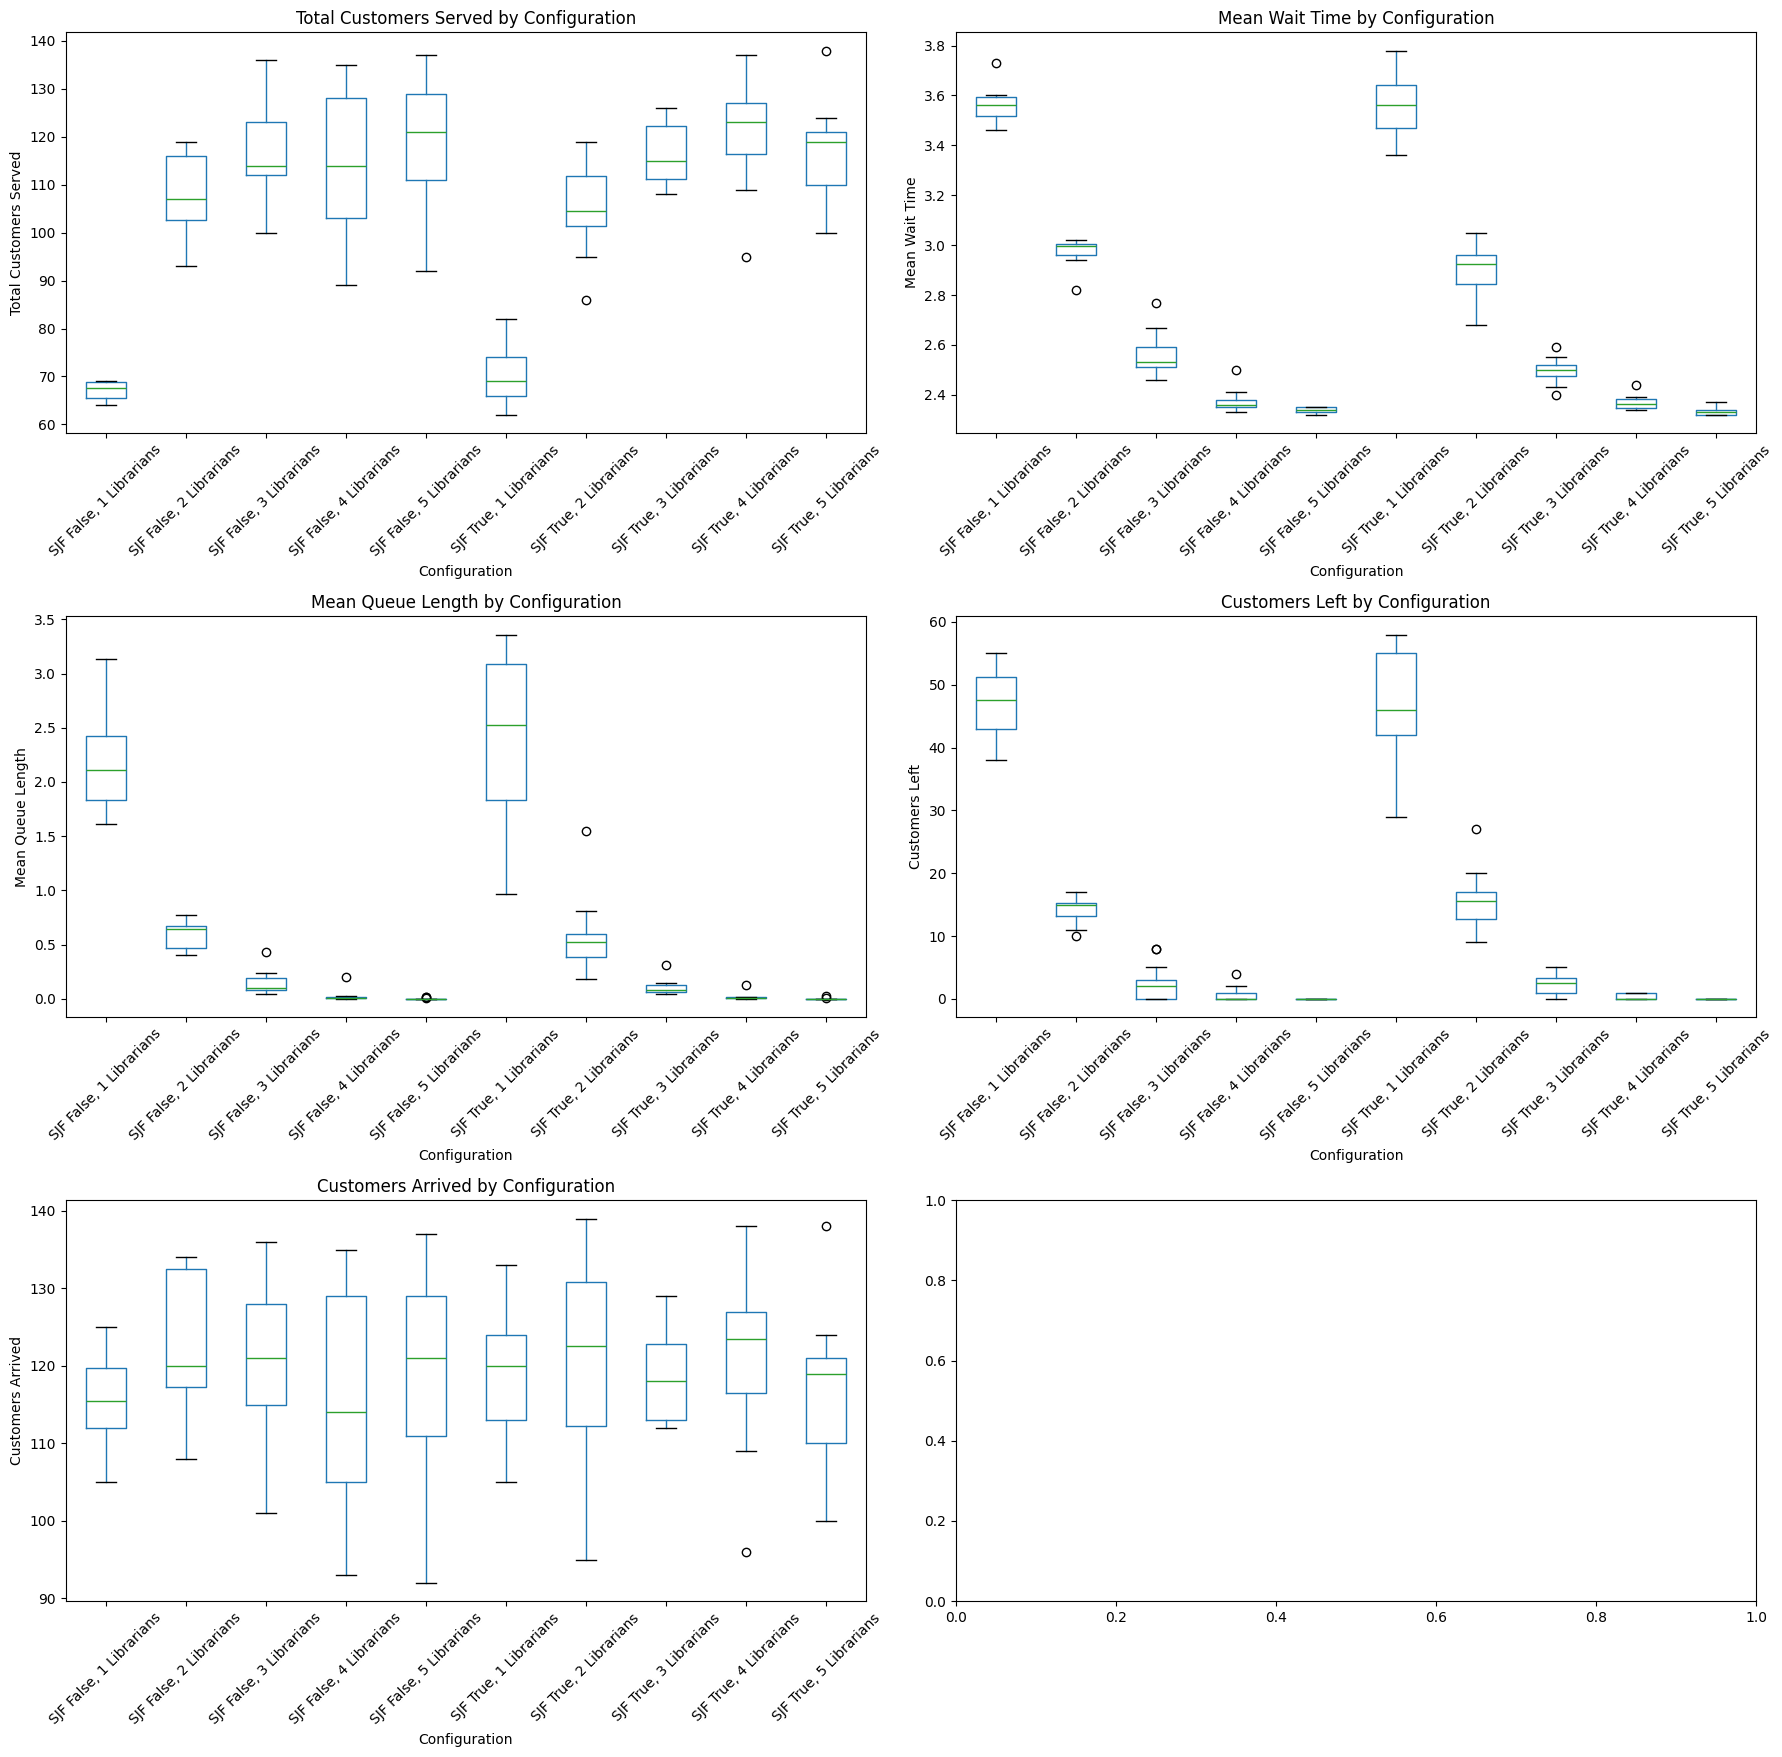

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
data = pd.read_csv('all_simulations_statistics.csv')

# # Convertir la columna 'Policy' a cadena para facilitar el manejo
# data['Policy'] = data['Policy'].astype(str)

data2 = data.copy()
# Crear una columna para representar las configuraciones

data2['Configuration'] = 'SJF ' + data2['SJF'].astype(str) + ', ' + data2['Num Librarians'].astype(str) + ' Librarians'

# Lista de las columnas de interés
columns_of_interest = [
    'Total Customers Served', 'Mean Wait Time', 'Mean Queue Length', 'Customers Left', 'Customers Arrived'
]

# Configurar el grid de gráficos
num_columns = 2
num_rows = (len(columns_of_interest) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 18))
axes = axes.flatten()

# Crear boxplots para cada columna de interés
for i, column in enumerate(columns_of_interest):
    # Crear el boxplot
    data2.boxplot(column=column, by='Configuration', ax=axes[i], grid=False)
    axes[i].set_title(f'{column} by Configuration')
    axes[i].set_xlabel('Configuration')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=45)

# Ajustar diseño para evitar superposición de gráficos
plt.tight_layout()
plt.suptitle('')  # Eliminar el título superfluo generado por pandas
plt.show()


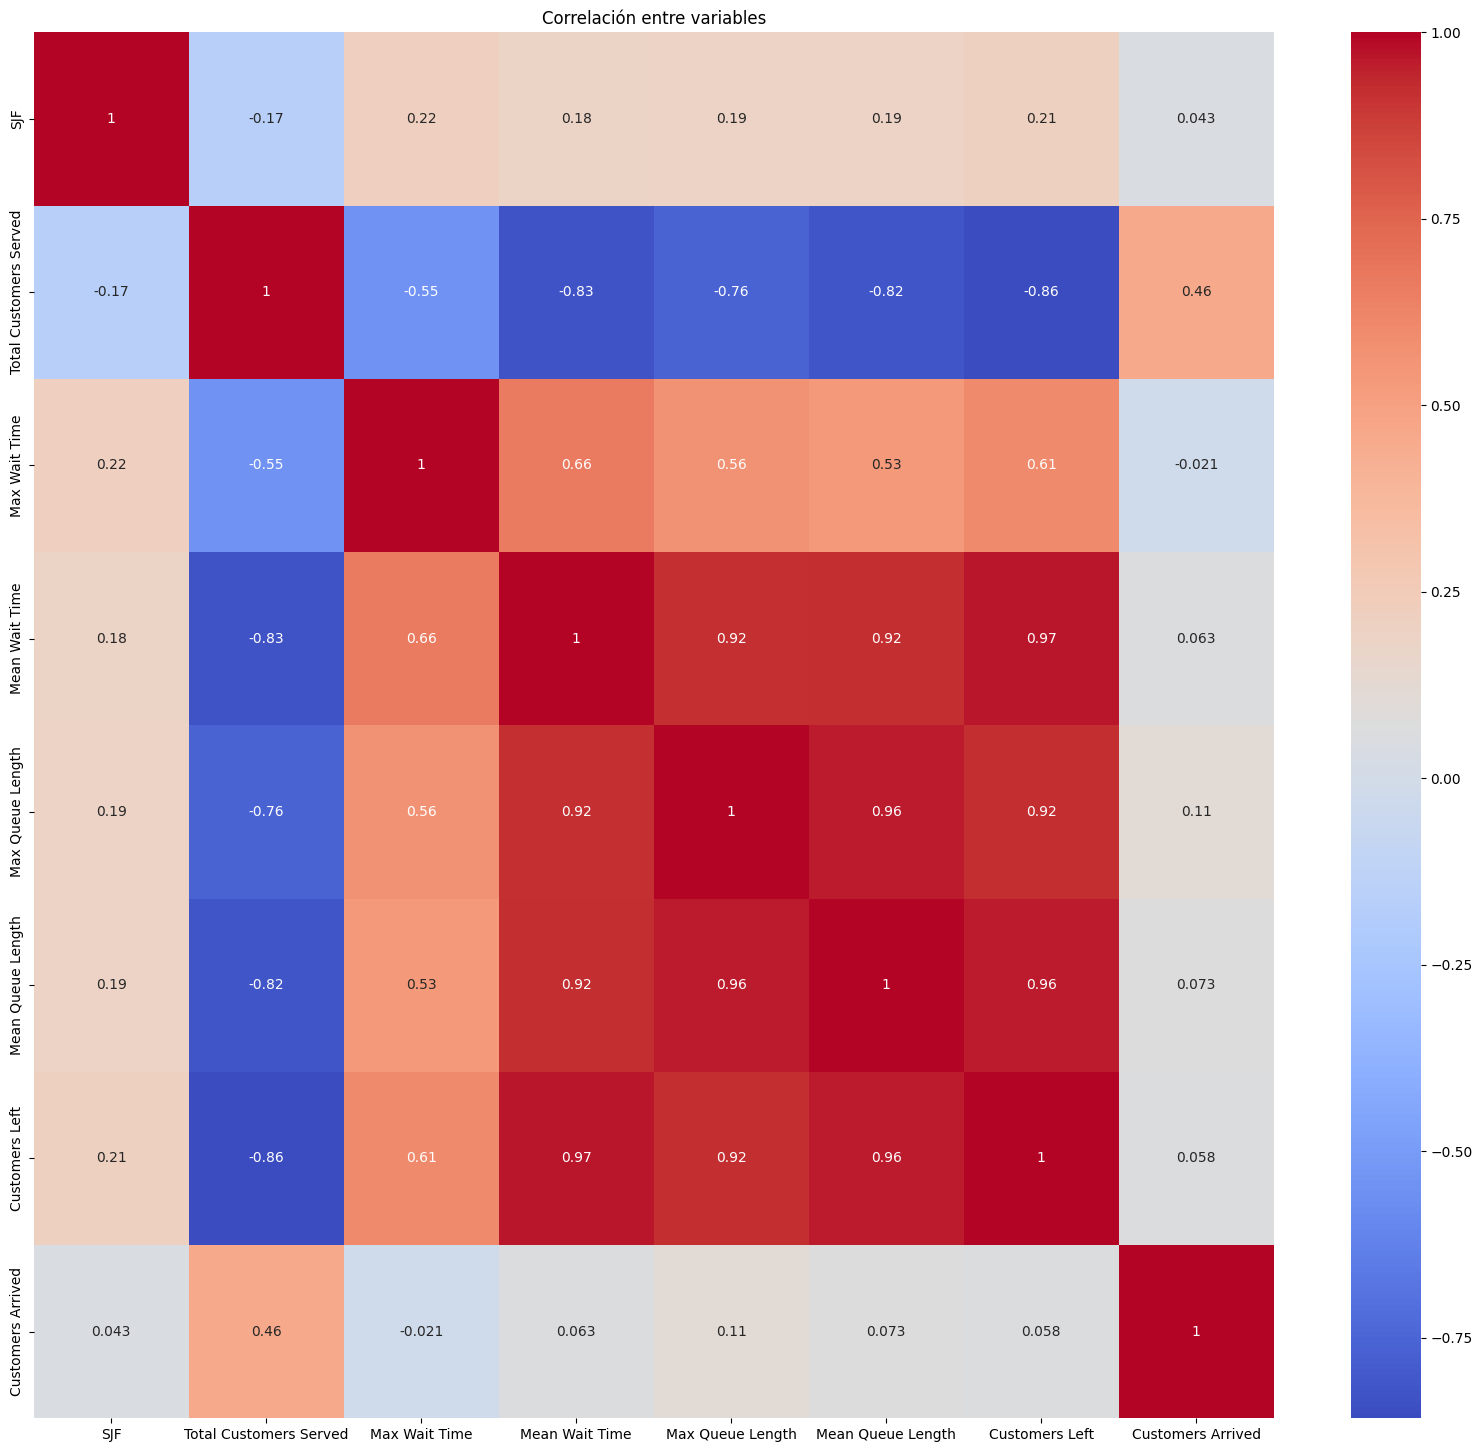

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar columnas relacionadas con Idle Time
columns_to_exclude = ['Mean Idle Time', 'Max Idle Time', 'Min Idle Time','Num Librarians']
data_filtered = data.drop(columns=columns_to_exclude)

# Calcular la matriz de correlación
correlation_matrix = data_filtered.corr()

# Generar el heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()


In [30]:
import pandas as pd
from scipy.stats import ttest_ind, shapiro, levene
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar los datos
# df = pd.read_csv('your_data_file.csv')  # Descomentar y ajustar si es necesario
df = data

# Renombrar las columnas para eliminar espacios
df.rename(columns={'Num Librarians': 'Num_Librarians', 'Mean Idle Time': 'Mean_Idle_Time'}, inplace=True)

for i in range(1,5):
    # Filtrar los datos para las dos configuraciones específicas
    i_librarians = df[(df['Num_Librarians'] == i) ]
    i_1_librarians = df[(df['Num_Librarians'] == i+1) ]

    # Datos para las pruebas
    data_i = i_librarians['Mean Wait Time']
    data_i_1 = i_1_librarians['Mean Wait Time']

    # Prueba de normalidad (Shapiro-Wilk)
    shapiro_test_i = shapiro(data_i)
    shapiro_test_i_1 = shapiro(data_i_1)
    print("Shapiro-Wilk Test ", i ,":", shapiro_test_i)
    print("Shapiro-Wilk Test ", i+1 ,":", shapiro_test_i_1)

    # Prueba de homogeneidad de varianzas (Levene)
    levene_test = levene(data_i, data_i_1)
    print("Levene's Test:", levene_test)

    # Prueba t de Student para muestras independientes
    t_test_result = ttest_ind(data_i, data_i_1, equal_var=(levene_test.pvalue > 0.05))
    print("T-test Result:", t_test_result)
    print("\n")




Shapiro-Wilk Test  1 : ShapiroResult(statistic=0.9883512762428632, pvalue=0.9960985263717423)
Shapiro-Wilk Test  2 : ShapiroResult(statistic=0.9050725610388208, pvalue=0.03759658526075197)
Levene's Test: LeveneResult(statistic=0.5643222963416391, pvalue=0.4570332073908794)
T-test Result: TtestResult(statistic=19.549206371809987, pvalue=9.385560552115521e-22, df=39.0)


Shapiro-Wilk Test  2 : ShapiroResult(statistic=0.9050725610388208, pvalue=0.03759658526075197)
Shapiro-Wilk Test  3 : ShapiroResult(statistic=0.9232980694952414, pvalue=0.1010182062566885)
Levene's Test: LeveneResult(statistic=0.8306984448047929, pvalue=0.36739852266380213)
T-test Result: TtestResult(statistic=14.053267743318028, pvalue=2.8546797089500944e-17, df=41.0)


Shapiro-Wilk Test  3 : ShapiroResult(statistic=0.9232980694952414, pvalue=0.1010182062566885)
Shapiro-Wilk Test  4 : ShapiroResult(statistic=0.8158825771222766, pvalue=0.003377654661077568)
Levene's Test: LeveneResult(statistic=3.000536872006985, pvalue=

In [31]:
import pandas as pd
from scipy.stats import ttest_ind, shapiro, levene
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar los datos
# df = pd.read_csv('your_data_file.csv')  # Descomentar y ajustar si es necesario
df = data

# Renombrar las columnas para eliminar espacios
df.rename(columns={'Num Librarians': 'Num_Librarians', 'Mean Idle Time': 'Mean_Idle_Time'}, inplace=True)

for i in range(1,5):
    # Filtrar los datos para las dos configuraciones específicas
    i_librarians = df[(df['Num_Librarians'] == i) ]
    i_1_librarians = df[(df['Num_Librarians'] == i+1) ]

    # Datos para las pruebas
    data_i = i_librarians['Total Customers Served']
    data_i_1 = i_1_librarians['Total Customers Served']

    # Prueba de normalidad (Shapiro-Wilk)
    shapiro_test_i = shapiro(data_i)
    shapiro_test_i_1 = shapiro(data_i_1)
    print("Shapiro-Wilk Test ", i ,":", shapiro_test_i)
    print("Shapiro-Wilk Test ", i+1 ,":", shapiro_test_i_1)

    # Prueba de homogeneidad de varianzas (Levene)
    levene_test = levene(data_i, data_i_1)
    print("Levene's Test:", levene_test)

    # Prueba t de Student para muestras independientes
    t_test_result = ttest_ind(data_i, data_i_1, equal_var=(levene_test.pvalue > 0.05))
    print("T-test Result:", t_test_result)
    print("\n")




Shapiro-Wilk Test  1 : ShapiroResult(statistic=0.8694795512950245, pvalue=0.014150403904716993)
Shapiro-Wilk Test  2 : ShapiroResult(statistic=0.9615626156282555, pvalue=0.5215023944373618)
Levene's Test: LeveneResult(statistic=4.590791351617746, pvalue=0.03844281252822237)
T-test Result: TtestResult(statistic=-16.72522242034446, pvalue=1.8998284803903316e-18, df=35.623466241540505)


Shapiro-Wilk Test  2 : ShapiroResult(statistic=0.9615626156282555, pvalue=0.5215023944373618)
Shapiro-Wilk Test  3 : ShapiroResult(statistic=0.9708749714725483, pvalue=0.7523381802781872)
Levene's Test: LeveneResult(statistic=0.01925890812044045, pvalue=0.8903061982577519)
T-test Result: TtestResult(statistic=-3.983824283924351, pvalue=0.00027149050108509355, df=41.0)


Shapiro-Wilk Test  3 : ShapiroResult(statistic=0.9708749714725483, pvalue=0.7523381802781872)
Shapiro-Wilk Test  4 : ShapiroResult(statistic=0.953936087919711, pvalue=0.5216529175027343)
Levene's Test: LeveneResult(statistic=3.295596437830

Mann-Whitney U Test Result: MannwhitneyuResult(statistic=1494.5, pvalue=0.13462333275559107)


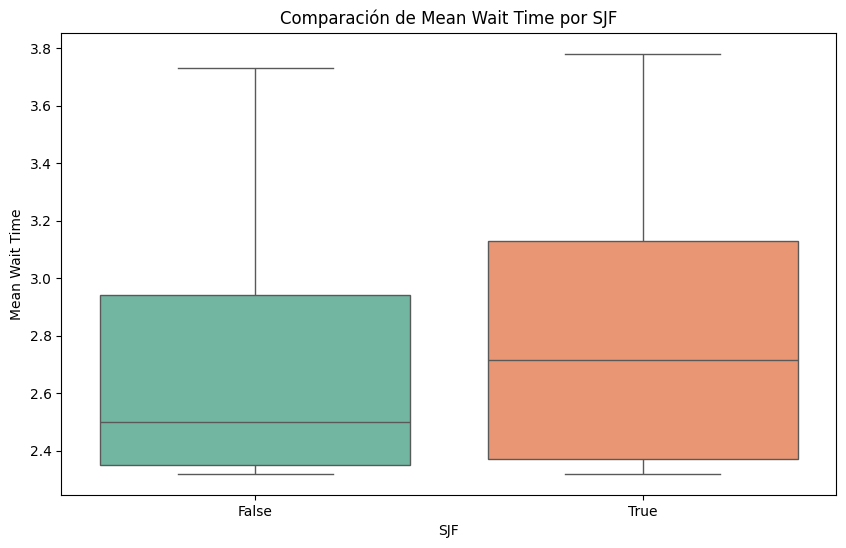

In [32]:
import pandas as pd
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame es `df`
# Filtrar los datos para los dos grupos específicos
group1 = df[df['SJF'] == True]['Mean Wait Time']
group2 = df[df['SJF'] == False]['Mean Wait Time']

# Prueba de Mann-Whitney U
mannwhitney_test = mannwhitneyu(group1, group2, alternative='two-sided')
print("Mann-Whitney U Test Result:", mannwhitney_test)

# Visualización de los datos con boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SJF', y='Mean Wait Time', data=df, hue='SJF', palette="Set2", dodge=False, legend=False)
plt.title('Comparación de Mean Wait Time por SJF')
plt.xlabel('SJF')
plt.ylabel('Mean Wait Time')
plt.show()


\subsection{Hipótesis extraídas de los resultados}
Como puede observarse en los BoxPLot parece haber cierta relación entre la aplicación de la política SJF y la mejora la media de tiempo de espera de los clientes (cita), esta es una de las hipótesis que se pueden extraer de los datos.
Otra hipótesis sería la posibilidad de que el añadir un quinto bibliotecario no afecte en sentido general a las métricas analizadas.

\subsection{Experimentos realizados para validar las hipótesis}
Para el análisis de la primera hipótesis se realizo un análisis de la correlación de las variables de salida con respecto a la aplicación de la política SJF (adjuntar foto). Como puede observarse la aplicación de esta política no tiene correlaciones significativas con ninguna de las variables de salida, lo cual entra en contradicción con lo que se observa en el BoxPlot. \\
Para comprobar la relación entre las variables SJF y Mean Wait Time se utilizó una prueba  Mann-Whitney U la cual es una alternativa a la prueba t de Student cuando no se cumplen los supuestos de normalidad. La misma arrojó los resultados siguientes:\\
MannwhitneyuResult(statistic=1248.0, pvalue=0.8624062624558004) (codigo)\\
El valor p es 0.8624, que es mucho mayor que 0.05. Esto indica que no hay suficiente evidencia para rechazar la hipótesis nula. En otras palabras, no hay una diferencia significativa en el tiempo medio de espera (Mean Wait Time) entre las configuraciones de "SJF=True" y "SJF=False".\\
\\
El BoxPlot indica que al añadir un quinto bibliotecario los datos tienen un comportamiento similar al que tenian con 4. Esto significa que solo representaría un costo adicional a la biblioteca y objetivamente no es necesario. Para validar esta hipótesis se realizó una prueba t de Student (ya que se pudo verificar que se cumplian los supuestos de la misma) para comprobar si existe una diferencia significativa en la cantidad de clientes atendidos en las configuraciones de 4 y 5 bibliotecarios (también se realiza un análisis similar para la variable tiempo medio de espera)\\
Los resultados son:\\
(Cantidad de clientes atendidos) T-test Result: TtestResult(statistic=1.56677385807371, pvalue=0.12417347029059797, df=45.0)\\
(Tiempo medio de espera) T-test Result: TtestResult(statistic=-0.748423343123664, pvalue=0.45809885435813613, df=45.0)\\
En ambos casos el pvalue es mayor que 0.05 por lo cual podemos concluir que no existe diferencia significativa en estas metricas en los grupos de datos de 4 y 5 bibliotecarios, por lo cual podemos concluir que la adición de un quinto bibliotecario no mejora significativamente el servicio en la biblioteca y por lo tanto no es necesario.

este es un fragmento del codigo en latex de mi informe a cerca de la simulacion. necesito que me lo corrijas tanto la ortografia como la coerencia y que me digas que puedo mejorar en esas secciones